In [11]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [12]:
df = pd.read_csv('data/people_data_clustering.csv', index_col=0)
print('Размеры', df.shape)
df.head()

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

In [13]:
df.dtypes

id               int64
was_married      int64
childrens      float64
salary         float64
sex              int64
age            float64
profession      object
home_cost      float64
drive_info     float64
dtype: object

In [14]:
df.describe()

,id,was_married,childrens,salary,sex,age,home_cost,drive_info
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,3230.000000
mean,2541.166667,0.842000,2.887167,92110.049587,0.661833,31.776667,1.019184e+07,0.729102
std,1670.447706,0.364771,2.850285,85255.778747,0.473125,32.546372,3.120066e+05,0.444492
min,0.000000,0.000000,0.000000,997.140000,0.000000,2.000000,9.824378e+06,0.000000
25%,999.750000,1.000000,1.000000,12521.570000,0.000000,10.000000,1.009639e+07,0.000000
50%,2499.500000,1.000000,2.000000,45221.445000,1.000000,17.000000,1.017716e+07,1.000000
75%,3999.250000,1.000000,4.000000,186389.350000,1.000000,32.000000,1.026920e+07,1.000000
max,5499.000000,1.000000,9.000000,217776.450000,1.000000,100.000000,2.065792e+07,1.000000


# Чтобы проверить нормальность воспользуемся визуальным методом и формальным(тест Шапиро-Уилка)
(см. http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'was_married'}>,
        <Axes: title={'center': 'childrens'}>],
       [<Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'home_cost'}>,
        <Axes: title={'center': 'drive_info'}>, <Axes: >]], dtype=object)

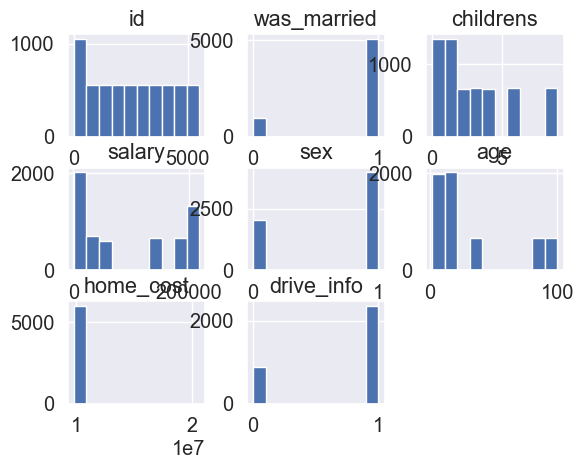

In [15]:
df.hist()

In [16]:
float_categories = ['was_married', 'childrens','salary', 'age', 'home_cost']

for category in float_categories:
    if stats.shapiro(df[category]).pvalue >= 0.05:
        print(f'{category} is normal distributed')
    else : print(f'{category} is NOT normal distributed')

was_married is NOT normal distributed
childrens is NOT normal distributed
salary is NOT normal distributed
age is NOT normal distributed
home_cost is NOT normal distributed


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Визуальная и формальная проверка не показала наличие нормального распределения среди числовых данных!

In [17]:
df.isnull().sum()/df.count() # проверяем заполненность 

id             0.000000
was_married    0.000000
childrens      0.000000
salary         0.000000
sex            0.000000
age            0.000000
profession     0.000000
home_cost      0.000000
drive_info     0.857585
dtype: float64

In [18]:
print(df.drop_duplicates().count() / df.count())

id             0.916667
was_married    0.916667
childrens      0.916667
salary         0.916667
sex            0.916667
age            0.916667
profession     0.916667
home_cost      0.916667
drive_info     0.921362
dtype: float64


**Выше видно соотношение дубликатов**

In [19]:
df = df.drop_duplicates()

In [20]:
 print(1 - df.isnull().sum()/df.count()) # проверяем заполненность 

id             1.000000
was_married    1.000000
childrens      1.000000
salary         1.000000
sex            1.000000
age            1.000000
profession     1.000000
home_cost      1.000000
drive_info     0.151882
dtype: float64


**Выше видно заполненность**

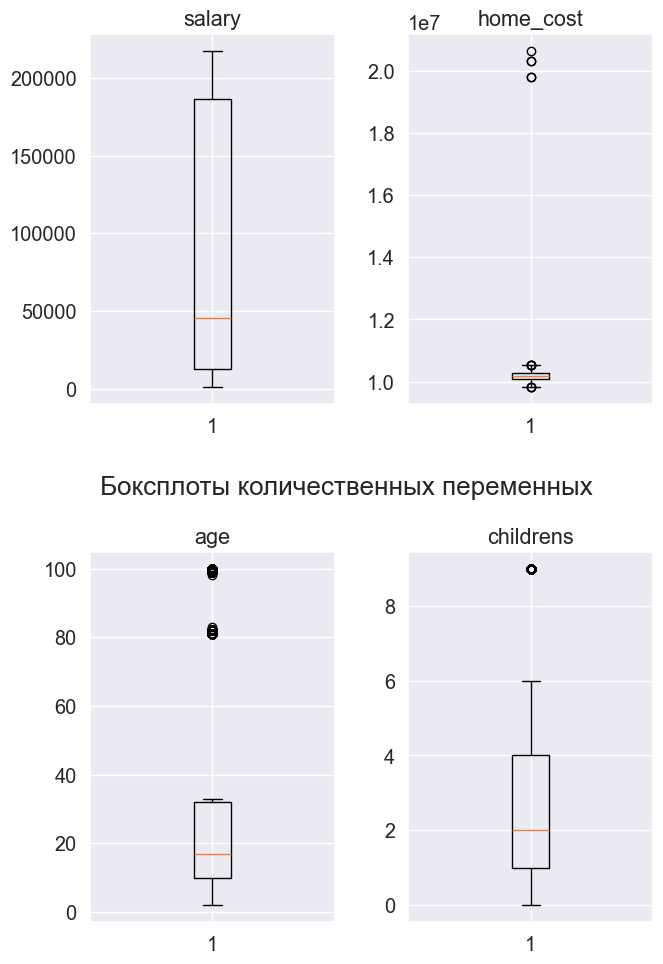

In [21]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)

fig.suptitle('Боксплоты количественных переменных')

axs[0,0].boxplot(df['salary'])
axs[0,0].set_title('salary')

axs[0,1].boxplot(df['home_cost'])
axs[0,1].set_title('home_cost')

axs[1,0].boxplot(df['age'])
axs[1,0].set_title('age')

axs[1,1].boxplot(df['childrens'])
axs[1,1].set_title('childrens')

fig.subplots_adjust(left=0.1, right=0.98, bottom=0.05, top=1.9,
                    hspace=0.4, wspace=0.3)

**По графикам выше видно, что в home_cost присутствуют серьезные выбросы.**

In [22]:
df.sort_values(by = 'home_cost', ascending=False)

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
4727,4727,1,1.0,12628.46,1,9.0,Marketing,2.065792e+07,1.0
1140,1140,1,4.0,44341.55,1,82.0,Engineer,2.032128e+07,1.0
1779,1779,1,3.0,1000.14,0,20.0,Homemaker,2.031197e+07,1.0
3380,3380,1,0.0,35910.63,1,3.0,Executive,1.979532e+07,0.0
3307,3307,1,0.0,35467.73,1,3.0,Executive,1.979488e+07,1.0
...,...,...,...,...,...,...,...,...,...
2445,2445,1,3.0,999.43,0,20.0,Homemaker,9.851725e+06,1.0
4365,4365,1,0.0,2019.79,0,17.0,Healthcare,9.838047e+06,0.0
4014,4014,1,3.0,1000.47,0,20.0,Homemaker,9.827240e+06,NaN
2070,2070,1,1.0,12372.11,1,9.0,Marketing,9.824841e+06,NaN


**Обычно выбросы удаляются(могут заменятся на медиану/среднее значение при систематических ошибках, например при сборе данных). Удалю их с помощью интерквантильного размаха(см. https://wiki.loginom.ru/articles/iqr.html)**

In [23]:
Q1 = df['home_cost'].quantile(q=.25)
Q3 = df['home_cost'].quantile(q=.75)
IQR = stats.iqr(df['home_cost'])

In [24]:
Q3 + 1.5 * IQR

10529813.69810053

In [25]:
df[df['home_cost'] <= Q3 + 1.5 * IQR].sort_values(by = 'home_cost', ascending=False)

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
5473,5473,1,2.0,201730.13,1,32.0,Doctor,1.052212e+07,NaN
3436,3436,0,1.0,183769.49,0,10.0,Lawyer,1.051468e+07,NaN
561,561,1,6.0,214728.99,1,13.0,Entertainment,1.051235e+07,1.0
2800,2800,1,2.0,202434.14,1,32.0,Doctor,1.051197e+07,1.0
5327,5327,0,1.0,185513.27,0,11.0,Lawyer,1.050983e+07,NaN
...,...,...,...,...,...,...,...,...,...
2445,2445,1,3.0,999.43,0,20.0,Homemaker,9.851725e+06,1.0
4365,4365,1,0.0,2019.79,0,17.0,Healthcare,9.838047e+06,0.0
4014,4014,1,3.0,1000.47,0,20.0,Homemaker,9.827240e+06,NaN
2070,2070,1,1.0,12372.11,1,9.0,Marketing,9.824841e+06,NaN


**Также удалим ненужные признаки**

In [26]:
params = ['id','childrens', 'salary', 'age', 'home_cost']
df_clean = df[params]
df_clean = df_clean[(df['home_cost'] <= Q3 + 1.5 * IQR) & (df['home_cost'] >= Q1 - 1.5 * IQR) ]

In [27]:
df_clean.sort_values(by = 'home_cost', ascending=False)

,id,childrens,salary,age,home_cost
5473,5473,2.0,201730.13,32.0,1.052212e+07
3436,3436,1.0,183769.49,10.0,1.051468e+07
561,561,6.0,214728.99,13.0,1.051235e+07
2800,2800,2.0,202434.14,32.0,1.051197e+07
5327,5327,1.0,185513.27,11.0,1.050983e+07
...,...,...,...,...,...
3296,3296,0.0,1970.77,17.0,9.865893e+06
1665,1665,1.0,12761.63,9.0,9.860624e+06
4982,4982,3.0,1000.75,21.0,9.852904e+06
2445,2445,3.0,999.43,20.0,9.851725e+06


In [28]:
print(f'Столько строк было удалено - \n{df.count() - df_clean.count()}')

Столько строк было удалено - 
age            12.0
childrens      12.0
drive_info      NaN
home_cost      12.0
id             12.0
profession      NaN
salary         12.0
sex             NaN
was_married     NaN
dtype: float64


In [29]:
df_clean

,id,childrens,salary,age,home_cost
0,0,4.0,45032.40,82.0,1.003674e+07
1,1,2.0,202004.64,32.0,1.014051e+07
2,2,6.0,213158.75,14.0,1.043318e+07
3,3,1.0,185692.78,10.0,1.004299e+07
4,4,9.0,132067.32,99.0,1.021908e+07
...,...,...,...,...,...
5495,5495,1.0,12676.77,9.0,1.027045e+07
5496,5496,6.0,215570.69,13.0,1.032767e+07
5497,5497,0.0,34734.29,3.0,1.010075e+07
5498,5498,1.0,12667.06,9.0,1.011321e+07


In [30]:
df_clean.corr()

,id,childrens,salary,age,home_cost
id,1.000000,-0.010088,0.000190,0.006497,0.004380
childrens,-0.010088,1.000000,0.394468,0.742357,0.286761
salary,0.000190,0.394468,1.000000,0.076016,0.710113
age,0.006497,0.742357,0.076016,1.000000,0.055680
home_cost,0.004380,0.286761,0.710113,0.055680,1.000000


<Axes: >

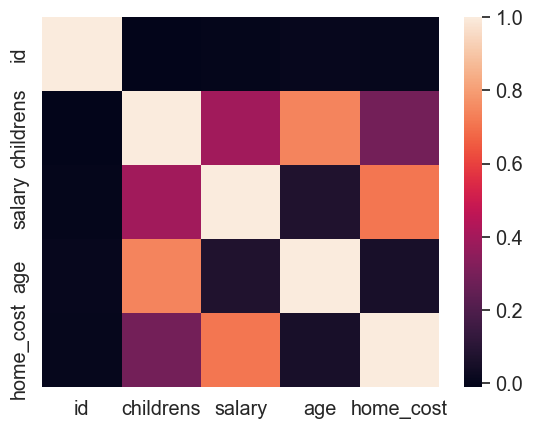

In [31]:
sns.heatmap(df_clean.corr())

**По матрице корреляций видно, что самые скоррелированные признаки это age(возраст) и childrens(кол-во детей), т.е чем больше возраст, тем обычно больше детей**

C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

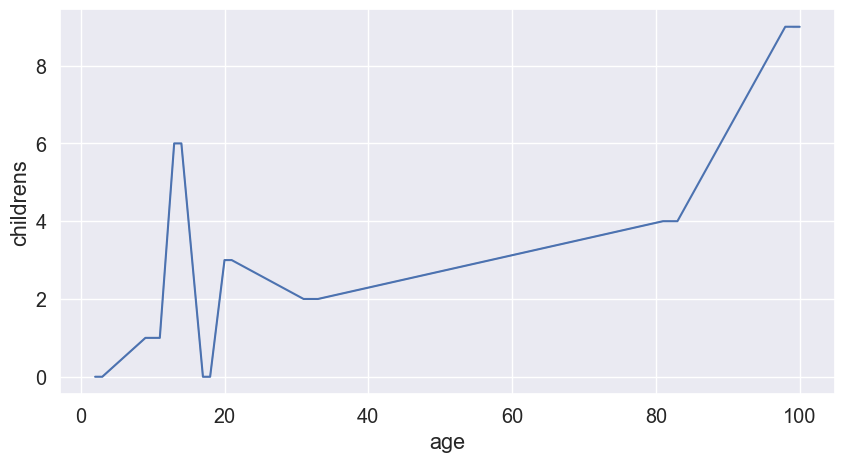

In [32]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df_clean, x = 'age', y = 'childrens',)

# Нормировка признаков


**Кластеризация выполняется с помощью k-means, это метрический алгоритм(т.е считается по расстоянию между точками(обычно по евклидовому расстоянию), соответсвенно необходимо пронормировать численные данные.)**

In [33]:
# Вспомогательные код
non_scalable_params = ['was_married', 'profession','sex']
scalable_params = ['childrens', 'salary', 'age', 'home_cost']

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

robust_scaler = RobustScaler()
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

norm_robust = robust_scaler.fit_transform(df_clean[scalable_params])
norm_std = std_scaler.fit_transform(df_clean[scalable_params])
norm_mm = mm_scaler.fit_transform(df_clean[scalable_params])

df_robust = pd.DataFrame(norm_robust, columns = scalable_params)
df_std = pd.DataFrame(norm_std, columns = scalable_params)
df_mm = pd.DataFrame(norm_mm, columns = scalable_params)


**Нужно провести нормализацию, чтобы все компоненты давали одинаковый вклад при расчете «расстояния». Для этого лучше подходит MinMaxScaler**

In [34]:
normal_data = df_mm

# Выделяем кластеры


In [35]:
from sklearn.cluster import KMeans
km_scores= []
km_silhouette = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=42).fit(normal_data)
    preds = km.predict(normal_data)
    
    print("Скор для кол-ва кластеров {}: {}".format(i,km.score(normal_data)))
    km_scores.append(-km.score(normal_data))

C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Скор для кол-ва кластеров 2: -1154.345555490721
Скор для кол-ва кластеров 3: -437.8148384661785
Скор для кол-ва кластеров 4: -279.52227145247565
Скор для кол-ва кластеров 5: -171.28254843510143
Скор для кол-ва кластеров 6: -122.64300741692138
Скор для кол-ва кластеров 7: -102.05348765064859


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Скор для кол-ва кластеров 8: -84.65571005860512
Скор для кол-ва кластеров 9: -78.50810948533271


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


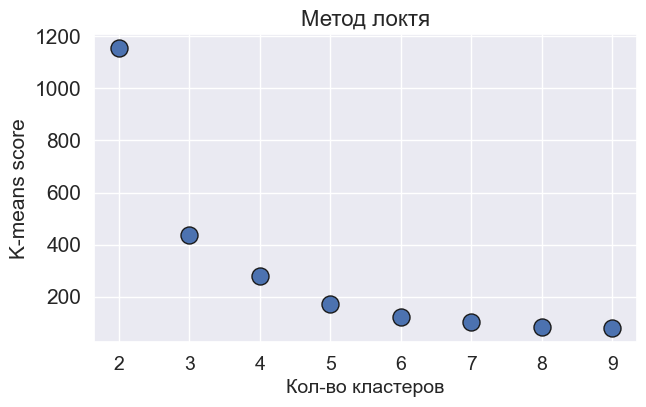

In [36]:
plt.figure(figsize=(7,4))
plt.title("Метод локтя",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Кол-во кластеров",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

**По данному графику сложно точно сказать оптимальное кол-во кластеров, можно попробовать узнать нужное кол-во с помощью метода силуэтов(см. https://en.wikipedia.org/wiki/Silhouette_(clustering))**

In [37]:
from sklearn.metrics import silhouette_score
km_silhouette = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=42, max_iter=500).fit(normal_data)
    preds = km.predict(normal_data)
    
    silhouette = silhouette_score(normal_data,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 2: 0.5005814605615703


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 3: 0.6530001517413377


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 4: 0.685528293457267


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 5: 0.69210110470245


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 6: 0.6174915238187081


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 7: 0.6052003581380497


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 8: 0.5604236339219472


C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for number of cluster(s) 9: 0.5545607120379588


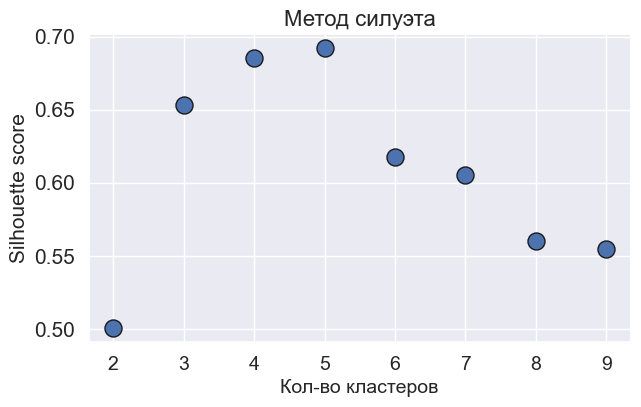

In [38]:
plt.figure(figsize=(7,4))
plt.title("Метод силуэта",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Кол-во кластеров",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

**Можно сделать вывод, что оптимальное кол-во кластеров -> 5**

In [39]:
km = KMeans(n_clusters=5, random_state=42, max_iter=500).fit(normal_data)
preds = km.predict(normal_data)
clusters = pd.DataFrame(preds, columns = ['clusters'])
normal_data['clusters'] = clusters

C:\Users\bigre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Снизить размерность


In [40]:


from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2,learning_rate='auto', perplexity = 5,
                 random_state=22, n_jobs=-1, 
                init='pca').fit_transform(normal_data)

data_x_y_z = TSNE(n_components=3, learning_rate='auto',
                 random_state=22, n_jobs=-1, perplexity = 5,
                init='pca').fit_transform(normal_data)

**Для наглядности можно нарисовать график в 3-х мерном пространстве**

# Нарисуем полученные кластеры

In [41]:
reduced_2dim_data = pd.DataFrame(data_x_y)
reduced_2dim_data['clusters'] = normal_data['clusters']

In [42]:
reduced_2dim_data

,0,1,clusters
0,54.782681,10.500957,3
1,43.154556,-15.961877,4
2,37.543961,84.412354,2
3,33.831589,-109.995056,4
4,-9.090586,55.721352,0
...,...,...,...
5483,-67.611382,-44.941036,1
5484,-12.563413,81.874962,2
5485,2.415247,-36.065884,1
5486,-46.780998,-15.680227,1


In [43]:
reduced_3dim_data = pd.DataFrame(data_x_y_z)
reduced_3dim_data['clusters'] =  normal_data['clusters']

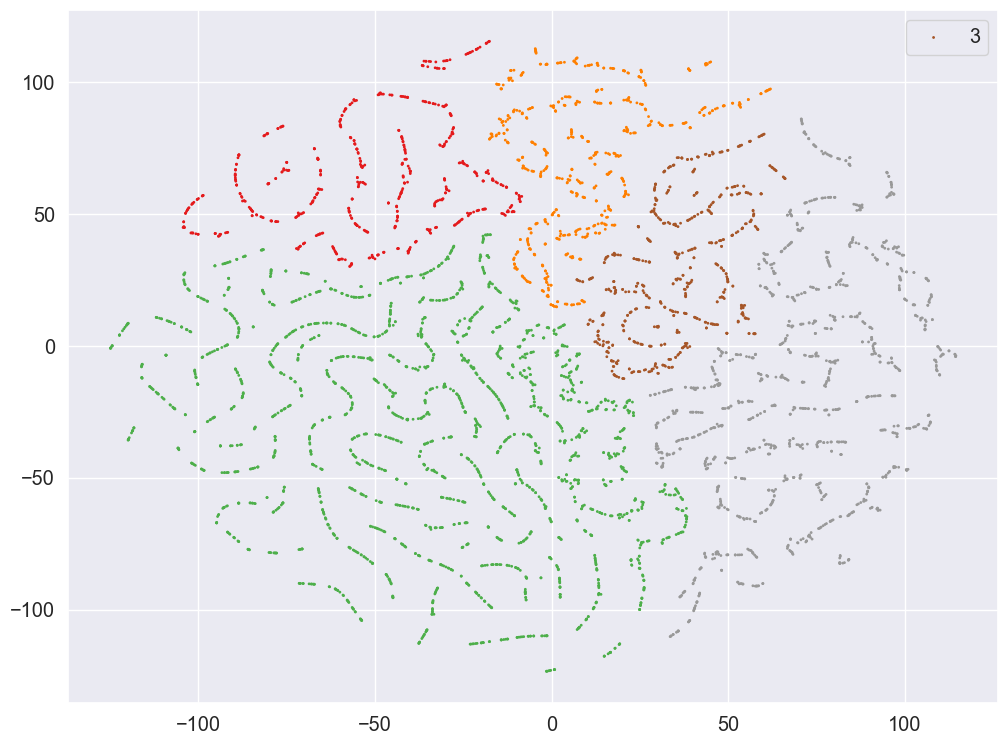

In [44]:
plt.figure(figsize=(12,9))
plt.scatter(reduced_2dim_data[0], reduced_2dim_data[1], c=reduced_2dim_data['clusters'], cmap ='Set1', s=1)
plt.legend(reduced_2dim_data['clusters'])

plt.show()

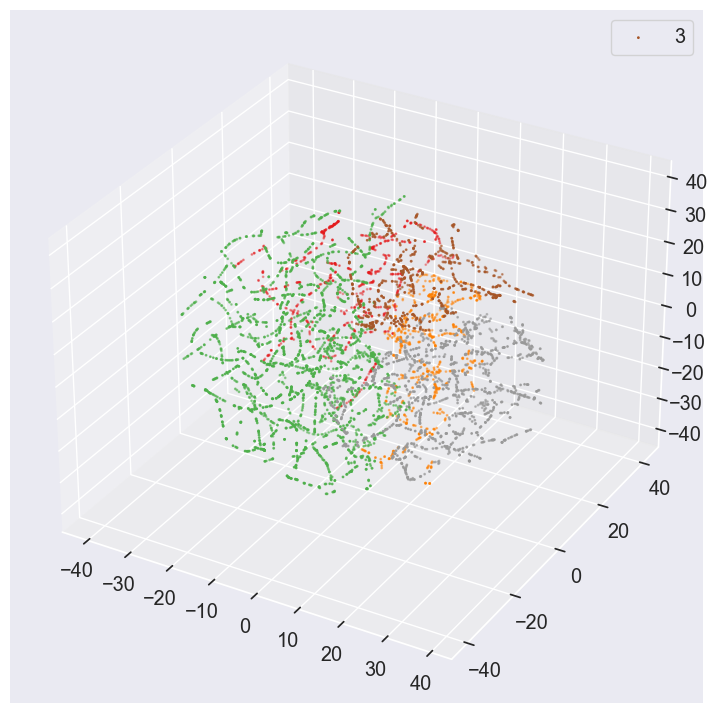

In [45]:

fig = plt.figure(figsize = (12,9))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(reduced_3dim_data[0], reduced_3dim_data[1], reduced_3dim_data[2], c=reduced_2dim_data['clusters'], 
             cmap ='Set1', s=1)
plt.legend(reduced_3dim_data['clusters'])
plt.show()

In [46]:
df_clean['clusters'] = clusters.to_numpy()

In [47]:
df_clean

,id,childrens,salary,age,home_cost,clusters
0,0,4.0,45032.40,82.0,1.003674e+07,3
1,1,2.0,202004.64,32.0,1.014051e+07,4
2,2,6.0,213158.75,14.0,1.043318e+07,2
3,3,1.0,185692.78,10.0,1.004299e+07,4
4,4,9.0,132067.32,99.0,1.021908e+07,0
...,...,...,...,...,...,...
5495,5495,1.0,12676.77,9.0,1.027045e+07,1
5496,5496,6.0,215570.69,13.0,1.032767e+07,2
5497,5497,0.0,34734.29,3.0,1.010075e+07,1
5498,5498,1.0,12667.06,9.0,1.011321e+07,1


**Оценим на какие группы мы смогли кластеровать данные**

In [48]:
for i in range(5):
    print (f'Кластер {i}: \n {df_clean[df_clean["clusters"] == i].describe().drop("clusters", axis = 1)}')

Кластер 0: 
                 id  childrens         salary         age     home_cost
count   611.000000      611.0     611.000000  611.000000  6.110000e+02
mean   2742.376432        9.0  132205.309247   99.414075  1.022447e+07
std    1604.028061        0.0     432.201197    0.496280  8.432684e+04
min       4.000000        9.0  130657.250000   98.000000  9.956517e+06
25%    1372.500000        9.0  131883.975000   99.000000  1.016634e+07
50%    2702.000000        9.0  132223.410000   99.000000  1.022535e+07
75%    4153.000000        9.0  132530.445000  100.000000  1.028119e+07
max    5482.000000        9.0  133405.140000  100.000000  1.044954e+07
Кластер 1: 
                 id    childrens        salary          age     home_cost
count  2438.000000  2438.000000   2438.000000  2438.000000  2.438000e+03
mean   2741.394996     0.999180  12967.294902    12.461854  1.010542e+07
std    1583.122924     1.224828  14170.568368     6.931340  8.272241e+04
min       5.000000     0.000000    997.1400

**Как можно увидеть разделение произошло в основном по возрасту и зарплате. Получились группы: Дети-подростки(малый доход), Дети(большой доход), Молодные/среднего возраста люди(средне-высокий доход), Пожилые люди(средне-низкий доход), Пожилые люди(средний доход). Так же в одном кластере присутствуют дети у которых большой доход и по 6 детей. Возможно кластеризация поймала группу людей с ошибочно занесенными данными**